### 3.1: Exploratory Data Analysis (EDA)

#### 3.1.1 Data Source

In [1]:
import numpy as np                # Mempermudah operasi aritmatika dalam data
import pandas as pd               # Operasi CRUD pada tabel dan data
import seaborn as sns             # Visualisasi data
import matplotlib.pyplot as plt   # Membuat chart dan grafik

In [2]:
df = pd.read_csv('./../resource/data_car.csv') # Membaca dataset dari data_car.csv
df.head()                                      # Menampilkan 5 data teratas dari dataset

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### 3.1.2 Data Types

In [3]:
df.dtypes       # Memeriksa tipe data yang digunakan setiap fitur

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

#### 3.1.3 Seleksi Fitur Manual

In [4]:
# Menyaring fitur yang tidak diperlukan
df=df.drop(['Engine Fuel Type','Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


#### 3.1.4 Renaming The Columns

In [5]:
# Mengubah nama fitur
rename_label = {
  'Engine HP': 'HP',
  'Engine Cylinders': 'Cylinders',
  'Transmission Type': 'Transmission',
  'Driven_Wheels': 'Drive Mode',
  'highway MPG': 'MPG-H',
  'city mpg': 'MPG-C',
  'MSRP': 'Price'
}
df = df.rename(columns=rename_label) 
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 3.1.5 Dropping The Dupicate Rows

In [6]:
df.shape

(11914, 10)

In [7]:
# Mencari jumlah baris yang sama (duplicate rows)
duplicate_rows_df = df[df.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows_df.shape}')

Number of duplicate rows: (989, 10)


In [8]:
df.count() # Menghitung jumlah baris dari masing-masing fitur

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [9]:
# Menghilangkan baris yang sama (duplicate rows)
df=df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

#### 3.1.6 Dropping The Missing Or Null Values

In [11]:
print(df.isnull().sum()) # Menampilkan fitur yang memiliki missing value

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [12]:
# Menghapus missing value dari setiap fitur yang memilikinya
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [13]:
print(df.isnull().sum()) # Menampilkan fitur yang memiliki missing value

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


#### 3.1.7 Outliers Detection

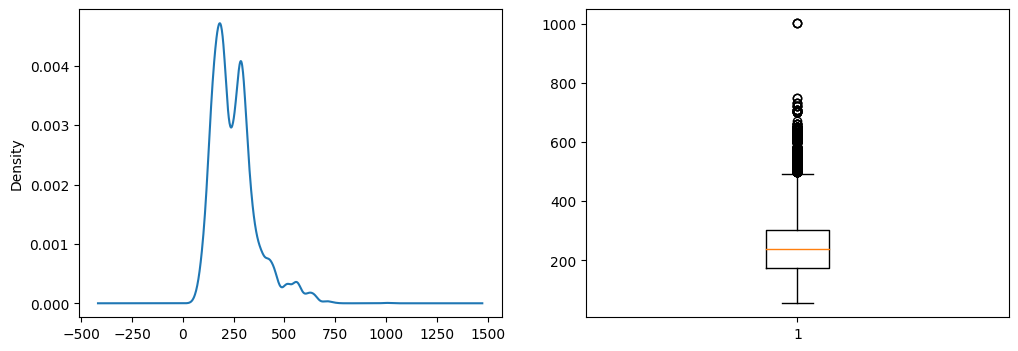

In [14]:
# Menampilkan sebaran data menggunakan plot distribusi dan boxplot
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['HP'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['HP'])
plt.show()

<AxesSubplot: xlabel='HP'>

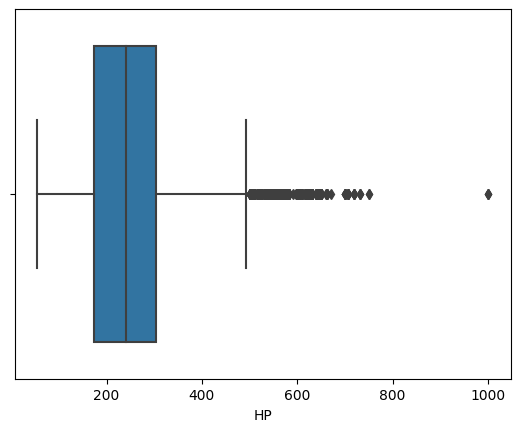

In [15]:
# Menampilkan sebaran menggunakan boxplot
sns.boxplot(x=df['HP'])

#### 3.1.8 Univariate Analysis

In [16]:
df['Price'].describe() # Menampilkan sebaran data dari fitur Price

count    1.082700e+04
mean     4.249325e+04
std      6.229451e+04
min      2.000000e+03
25%      2.197250e+04
50%      3.084500e+04
75%      4.330000e+04
max      2.065902e+06
Name: Price, dtype: float64

<AxesSubplot: xlabel='Price'>

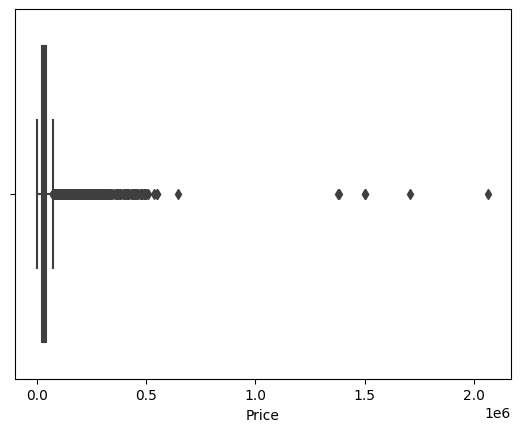

In [17]:
sns.boxplot(x=df['Price']) # Menampilkan sebaran fitur Price menggunakan boxplot

Text(0.5, 0, 'Make')

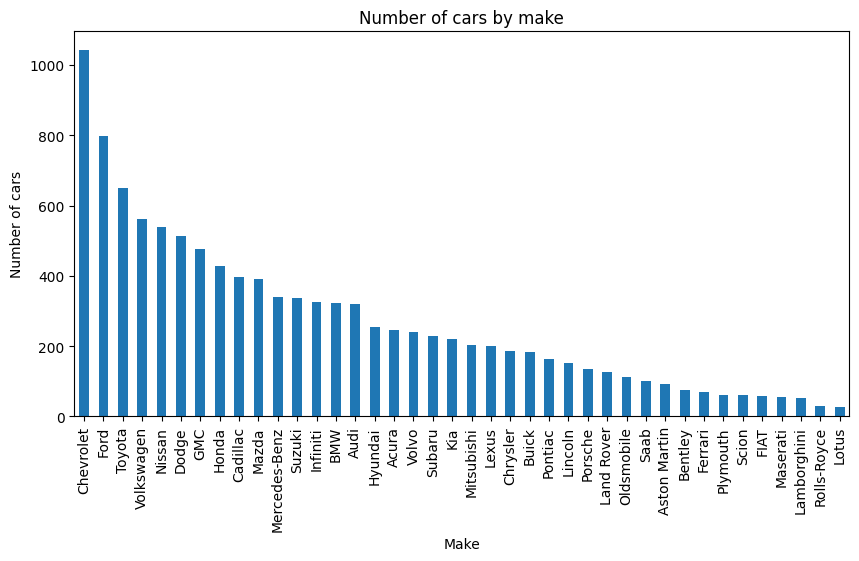

In [18]:
# Membuat visualisasi histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')

#### 3.1.9 Bivariate Analysis

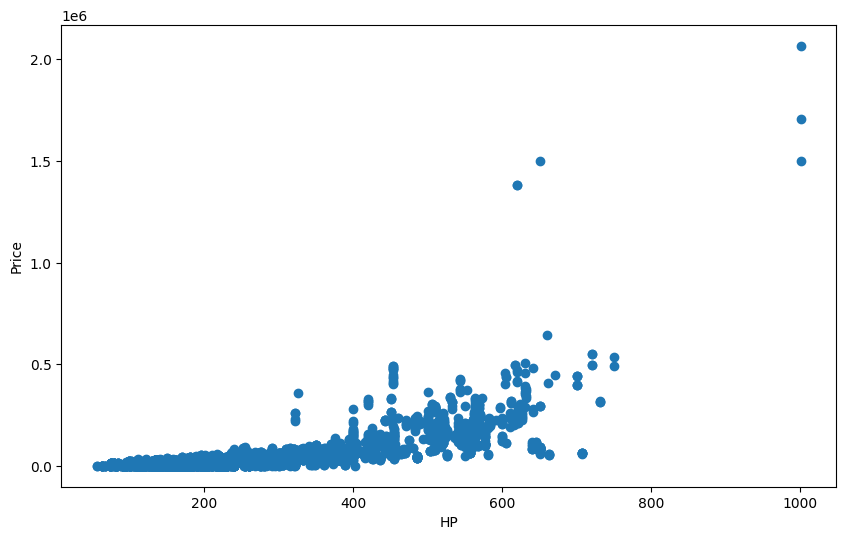

In [19]:
# Membuat visualisasi data scatter plot antara fitur Price dan HP
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

In [20]:
df[['HP', 'Price']].corr() # Menampilkan korelasi antara fitur HP dan fitur Price

,HP,Price
HP,1.000000,0.659835
Price,0.659835,1.000000


C:\Users\Fritz\AppData\Local\Temp\ipykernel_14500\189357522.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


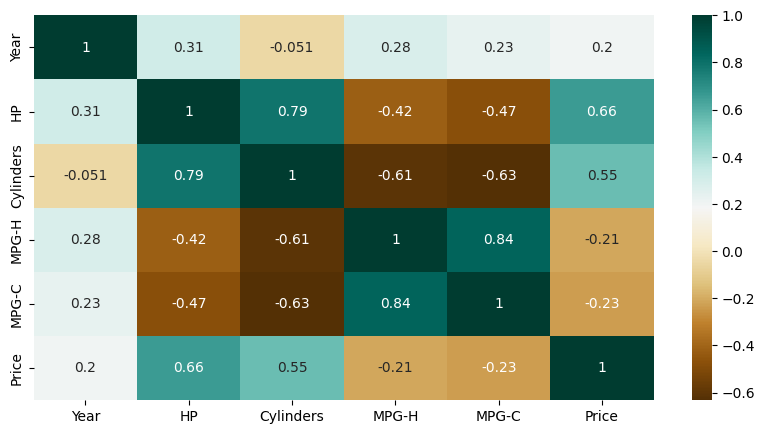

In [21]:
# Menampilkan korelasi seluruh fitur menggunakan Heat Map.
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

#### 3.1.10 Multivariate Analysis

In [22]:
# Mencari korelasi antara fitur Transmission, Drive Mode dan Price
result = pd.pivot_table(data=df, index='Transmission', columns='Drive Mode', values='Price')
print(result)

Drive Mode        all wheel drive  four wheel drive  front wheel drive  \
Transmission                                                             
AUTOMATED_MANUAL    157828.994949               NaN       30761.103896   
AUTOMATIC            48403.715344      43019.606742       26441.647017   
DIRECT_DRIVE                  NaN               NaN       30318.181818   
MANUAL               60817.829016      12554.718412       15394.341637   
UNKNOWN                       NaN       2447.500000        2000.000000   

Drive Mode        rear wheel drive  
Transmission                        
AUTOMATED_MANUAL     175529.387097  
AUTOMATIC             56987.558117  
DIRECT_DRIVE          42700.000000  
MANUAL                44945.319690  
UNKNOWN                5146.500000  


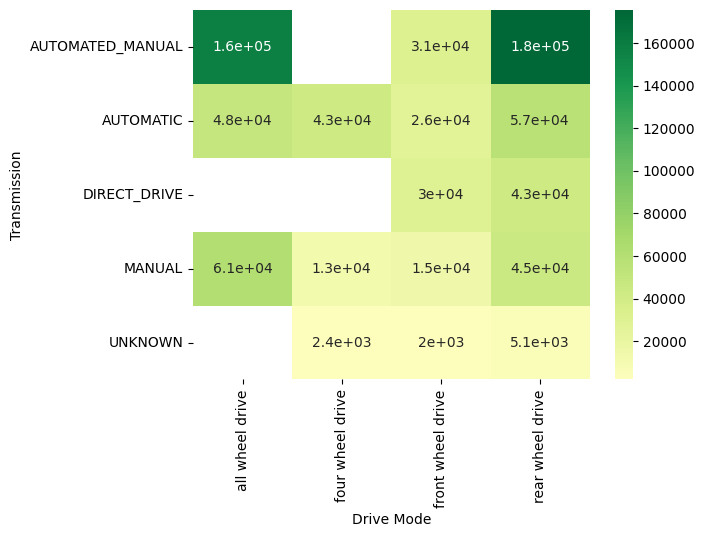

In [23]:
# Menampilkan hasil korelasi 3 fitur tersebut dalam bentuk Heat Map
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()